total_return:	-0.04%
entries_counts:	11			exits_counts:	11


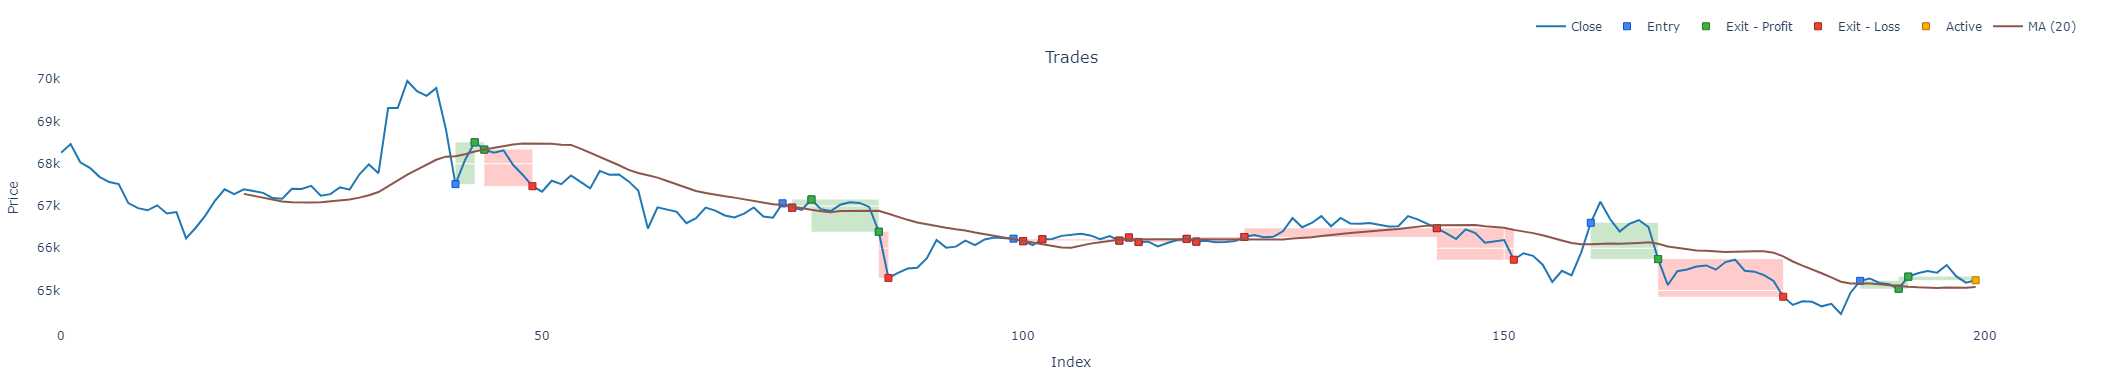

In [41]:
# vectorbt example：单数据单信号(单均线)策略示例
import pdb
import ccxt
import numpy as np
import pandas as pd
import vectorbt as vbt
import wind_library
# 定义变量
symbol = 'BTC/USDT'

# 获取Gate.io交易所BTC/USDT的1天K线数据
btc_price = wind_library.get_ccxt_exchange_kline('gate', symbol, 'spot', '1h', 200).close

# 设置均线参数
ma_length = 20

# 单均线策略
ma = vbt.MA.run(btc_price, ma_length, short_name='ma')
entries = ma.ma_crossed_above(btc_price)
exits = ma.ma_crossed_below(btc_price)

# 创建投资组合对象
pf = vbt.Portfolio.from_signals(btc_price, entries, exits, direction='both', size=np.inf, fees=0.001, freq='1h', sl_stop=0.01, tp_stop=0.02)

# 打印结果
print(f'total_return:\t{pf.total_return():.2f}%')
# print(pf.stats().loc[['Total Return [%]', 'Win Rate [%]', 'Max Drawdown [%]']])    # 打印部分结果
print(f'entries_counts:\t{entries[entries == True].count()}{"\t"*3}exits_counts:\t{exits[exits == True].count()}')
# print(pf.trades.records_readable[['Entry Fees', 'Exit Fees', 'PnL', 'Return']])    # 打印每笔信号

# 绘制白底图表
fig = pf.plots(subplots='trades', width=1000, settings=dict(background_color='white', title=symbol))
fig.add_scatter(x=btc_price.index, y=ma.ma, mode='lines', name=f'MA ({ma_length})')
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
fig.show()

# # 绘制默认图表
# fig = pf.trades.plot(width=1000)
# fig.add_scatter(x=btc_price.index, y=ma.ma, mode='lines', name=f'MA ({ma_length})')
# fig.show()

total_return:	0.02%
entries_counts:	5			exits_counts:	4
   Entry Fees  Exit Fees       PnL    Return
0    0.099900   0.102928  2.824664  0.028275
1    0.102722   0.099422  3.097720  0.030156
2    0.105817   0.105583 -0.445044 -0.004206
3    0.105372   0.105619 -0.457547 -0.004342
4    0.104915   0.105127  0.001806  0.000017
5    0.104917   0.105304 -0.597542 -0.005695
6    0.104320   0.102838 -1.689250 -0.016193
7    0.102632   0.103150 -0.723259 -0.007047
8    0.101910   0.000000 -0.281566 -0.002763


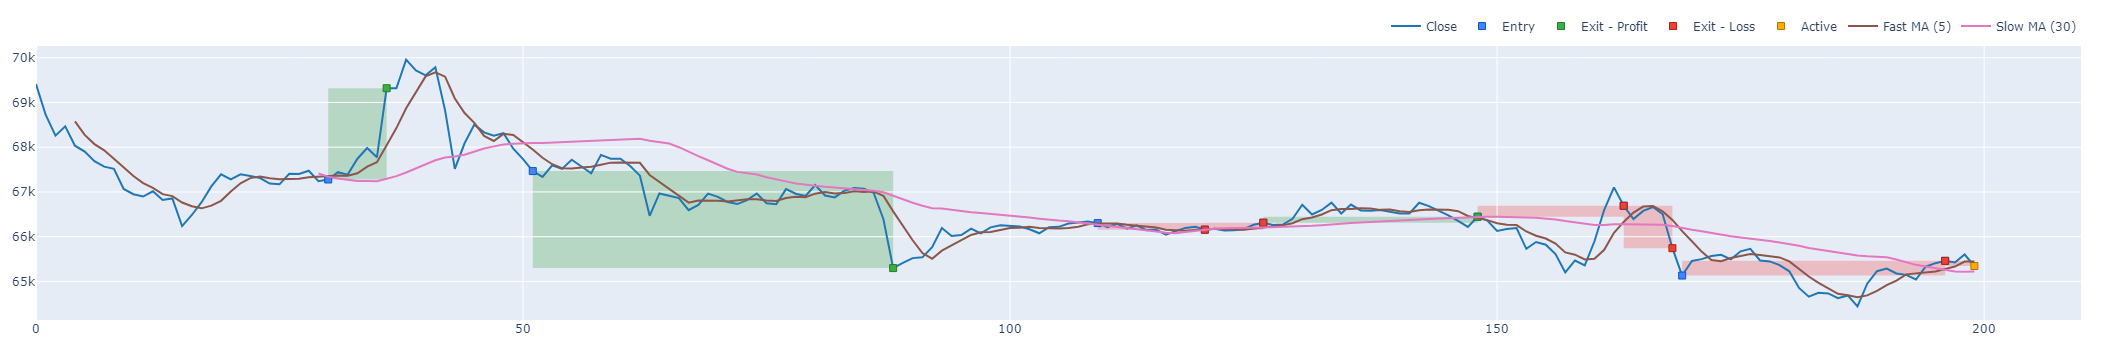

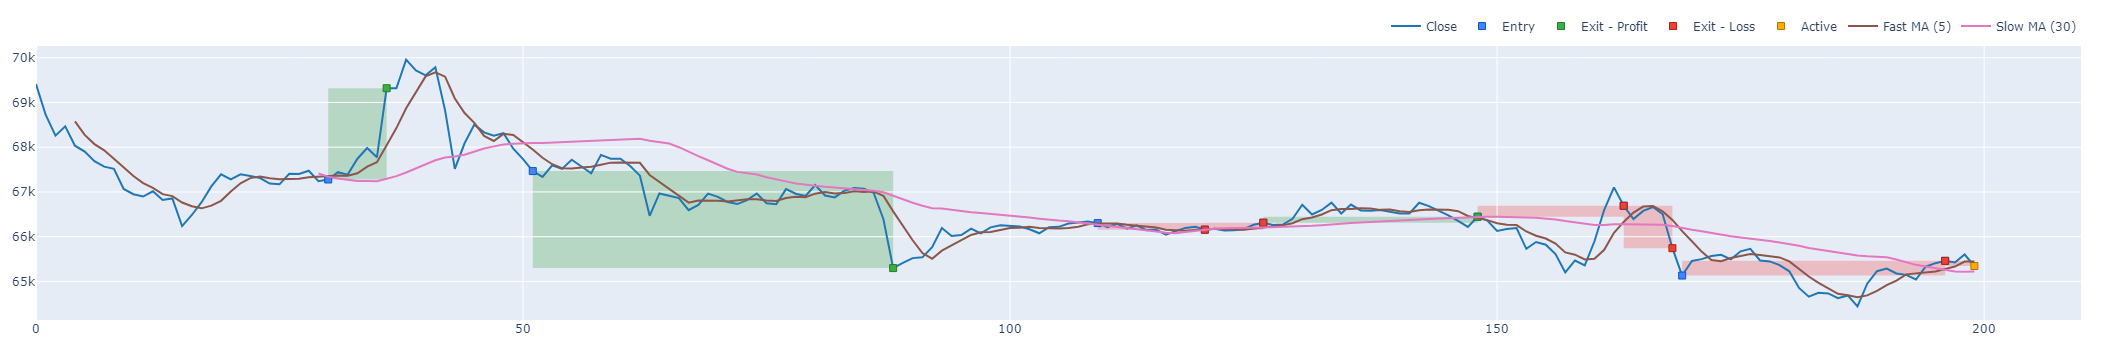

In [18]:
# vectorbt example：单数据单信号(双均线)策略示例
import pdb
import ccxt
import numpy as np
import pandas as pd
import vectorbt as vbt
import wind_library

# 获取Gate.io交易所BTC/USDT的1天K线数据
btc_price = wind_library.get_ccxt_exchange_kline('gate', 'BTC/USDT', 'spot', '1h', 200).close
price_etc = wind_library.get_ccxt_exchange_kline('gate', 'ETC/USDT', 'spot', '1d', 100).close
# one strategy instances: 
# 获取Gate.io交易所BTC/USDT的1天K线数据
btc_price = wind_library.get_ccxt_exchange_kline('gate', 'BTC/USDT', 'spot', '1h', 200).close

# 设置均线参数
fast_ma_length = 5
slow_ma_length = 30

# 双均线策略
fast_ma = vbt.MA.run(btc_price, fast_ma_length, short_name='fast')
slow_ma = vbt.MA.run(btc_price, slow_ma_length, short_name='slow')
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

# 创建投资组合对象
pf = vbt.Portfolio.from_signals(btc_price, entries, exits, direction='both', size=np.inf, fees=0.001, freq='1h', sl_stop=0.01, tp_stop=0.02)

# 打印结果
print(f'total_return:\t{pf.total_return():.2f}%')
print(f'entries_counts:\t{entries[entries == True].count()}{"\t"*3}exits_counts:\t{exits[exits == True].count()}')
print(pf.trades.records_readable[['Entry Fees', 'Exit Fees', 'PnL', 'Return']])

# 绘制图表
fig = pf.trades.plot(width=1000)
fig.add_scatter(x=btc_price.index, y=fast_ma.ma, mode='lines', name=f'Fast MA ({fast_ma_length})')
fig.add_scatter(x=btc_price.index, y=slow_ma.ma, mode='lines', name=f'Slow MA ({slow_ma_length})')
fig.show()    # 显示图表
# 
# pf.orders.plot(width=1000).show()  #绘制下单信号图示
# pf.trades.plot().show()    # 绘制交易信号图
# print(price_etc)

In [11]:
# vectorbt example：多股票多指标策略
import pdb
import ccxt
import numpy as np
import pandas as pd
import wind_library
import vectorbt as vbt


# 获取Gate.io交易所BTC/USDT的1天K线数据
btc_price = wind_library.get_ccxt_exchange_kline('gate', 'BTC/USDT', 'spot', '1d', 100).close
etc_price = wind_library.get_ccxt_exchange_kline('gate', 'ETC/USDT', 'spot', '1d', 100).close
comb_price = btc_price.vbt.concat(etc_price, keys=pd.Index(['BTC', 'ETC'], name='symbol'))
comb_price.vbt.drop_levels(-1, inplace=True)
# Multiple strategy instances: (10, 30) and (20, 30)
fast_ma = vbt.MA.run(comb_price, [10, 20], short_name='fast')
slow_ma = vbt.MA.run(comb_price, [30, 30], short_name='slow')
# 交易信号
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
pf = vbt.Portfolio.from_signals(comb_price, entries, exits, direction='both', size=np.inf, fees=0.001, freq='1h', sl_stop=0.01, tp_stop=0.02)
print(f'total_return:\n{pf.total_return()}')    # 计算投资组合的总收益
mean_return = pf.total_return().groupby('symbol').mean()     # 按照 'symbol' 分组计算平均收益
mean_return.vbt.barplot(xaxis_title='Symbol', yaxis_title='Mean total return')     # 绘制条形图，x 轴为 'Symbol'，y 轴为 'Mean total return'
# print(price_etc)

total_return:
fast_window  slow_window  symbol
10           30           BTC       0.117389
                          ETC      -0.034720
20           30           BTC      -0.021097
                          ETC      -0.102157
Name: total_return, dtype: float64


FigureWidget({
    'data': [{'name': 'total_return',
              'showlegend': True,
              'type': 'bar',
              'uid': '6a5c9556-6e00-4566-9b4d-ede9d25426b7',
              'x': array(['BTC', 'ETC'], dtype=object),
              'y': array([ 0.04814623, -0.06843861])}],
    'layout': {'height': 350,
               'legend': {'orientation': 'h',
                          'traceorder': 'normal',
                          'x': 1,
                          'xanchor': 'right',
                          'y': 1.02,
                          'yanchor': 'bottom'},
               'margin': {'b': 30, 'l': 30, 'r': 30, 't': 30},
               'template': '...',
               'width': 700,
               'xaxis': {'title': {'text': 'Symbol'}},
               'yaxis': {'title': {'text': 'Mean total return'}}}
})

In [17]:
# vectorbt example：多股票多指标多时间段策略
import pdb
import ccxt
import numpy as np
import pandas as pd
import wind_library
import vectorbt as vbt


# 获取Gate.io交易所BTC/USDT的1天K线数据
btc_price = wind_library.get_ccxt_exchange_kline('gate', 'BTC/USDT', 'spot', '1d', 100).close
etc_price = wind_library.get_ccxt_exchange_kline('gate', 'ETC/USDT', 'spot', '1d', 100).close
comb_price = btc_price.vbt.concat(etc_price, keys=pd.Index(['BTC', 'ETC'], name='symbol'))
comb_price.vbt.drop_levels(-1, inplace=True)
# Multiple strategy instances, instruments, and time periods
mult_comb_price, _ = comb_price.vbt.range_split(n=2)   # 时间分段
mult_comb_price
#
# Multiple strategy instances: (10, 30) and (20, 30)
fast_ma = vbt.MA.run(mult_comb_price, [10, 20], short_name='fast')
slow_ma = vbt.MA.run(mult_comb_price, [30, 30], short_name='slow')
# 交易信号
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
pf = vbt.Portfolio.from_signals(mult_comb_price, entries, exits, direction='both', size=np.inf, fees=0.001, freq='1d', sl_stop=0.01, tp_stop=0.02)
pf.total_return()
# pdb.set_trace()
print(f'total_return:\n{pf.total_return()}')    # 计算投资组合的总收益
mean_return = pf.total_return().groupby(['split_idx', 'symbol']).mean()     # 按照 'symbol' 分组计算平均收益
mean_return.unstack(level=-1).vbt.barplot(xaxis_title='Split index', yaxis_title='Mean total return', legend_title_text='Symbol')     # 绘制条形图，x 轴为 'Symbol'，y 轴为 'Mean total return'
# mean_return = pf.total_return().groupby(['split_idx', 'symbol']).mean()     # 按照 'symbol' 分组计算平均收益
# mean_return.unstack(level=-1).vbt.barplot(xaxis_title='Split index', yaxis_title='Mean total return', legend_title_text='Symbol')

total_return:
fast_window  slow_window  split_idx  symbol
10           30           0          BTC       0.037515
                                     ETC       0.036957
                          1          BTC       0.007604
                                     ETC       0.041657
20           30           0          BTC      -0.025235
                                     ETC      -0.069377
                          1          BTC       0.020571
                                     ETC      -0.014601
Name: total_return, dtype: float64


FigureWidget({
    'data': [{'name': 'BTC',
              'showlegend': True,
              'type': 'bar',
              'uid': '9f71bd06-8bef-4d6e-a4a0-a4af021344d2',
              'x': array([0, 1], dtype=int64),
              'y': array([0.00614006, 0.01408777])},
             {'name': 'ETC',
              'showlegend': True,
              'type': 'bar',
              'uid': '752d47e7-67f0-4176-8a00-966b57ef337f',
              'x': array([0, 1], dtype=int64),
              'y': array([-0.01621004,  0.01352803])}],
    'layout': {'height': 350,
               'legend': {'orientation': 'h',
                          'title': {'text': 'Symbol'},
                          'traceorder': 'normal',
                          'x': 1,
                          'xanchor': 'right',
                          'y': 1.02,
                          'yanchor': 'bottom'},
               'margin': {'b': 30, 'l': 30, 'r': 30, 't': 30},
               'template': '...',
               'width': 700,
    

total_return:	0.01%
entries_counts:	22			exits_counts:	14
   Entry Fees  Exit Fees       PnL    Return
0    0.099900   0.098145 -1.952965 -0.019549
1    0.097949   0.099072  0.926104  0.009455
2    0.098874   0.100939  1.864940  0.018862
3    0.100737   0.099395 -1.542518 -0.015312
4    0.099196   0.100643  1.246534  0.012566
5    0.100442   0.101432  0.788313  0.007848
6    0.101229   0.000000 -0.355288 -0.003510


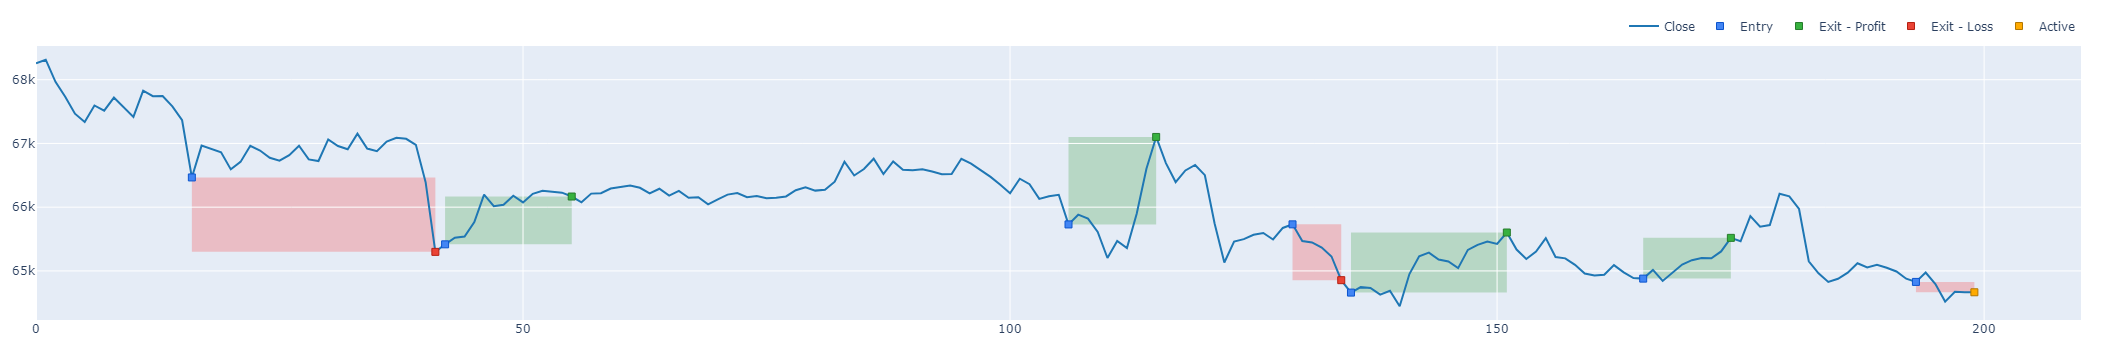

In [3]:
# RSI策略回测
import pdb
import ccxt
import numpy as np
import pandas as pd
import wind_library
import vectorbt as vbt

# 获取Gate.io交易所BTC/USDT的1小时K线数据
btc_price = wind_library.get_ccxt_exchange_kline('gate', 'BTC/USDT', 'spot', '1h', 200).close

# RSI参数设置
rsi_window = 14

# 计算RSI指标
rsi = vbt.RSI.run(btc_price, rsi_window, short_name='RSI')

# 定义进入和退出条件：RSI低于某个阈值买入，高于某个阈值卖出
entry_threshold = 30  # RSI低于30时看涨
exit_threshold = 70  # RSI高于70时看跌
entries = rsi.rsi < entry_threshold
exits = rsi.rsi > exit_threshold

# 创建投资组合对象
# 注意：这里假设'both'方向可能不太适合RSI策略，通常RSI低买高卖对应'long'方向
pf = vbt.Portfolio.from_signals(btc_price, entries, exits, direction='longonly', size=np.inf, fees=0.001, freq='1h', sl_stop=0.01, tp_stop=0.02)

# 打印结果
print(f'total_return:\t{pf.total_return():.2f}%')
print(f'entries_counts:\t{entries[entries].count()}{"\t"*3}exits_counts:\t{exits[exits].count()}')
print(pf.trades.records_readable[['Entry Fees', 'Exit Fees', 'PnL', 'Return']])

# 绘制图表
fig = pf.trades.plot(width=1000)
# fig.add_scatter(x=btc_price.index, y=rsi.rsi, mode='lines', name=f'RSI ({rsi_window})')
fig.show()  # 显示图表

total_return:	-0.01%
entries_counts:	24			exits_counts:	14
   Entry Fees  Exit Fees       PnL    Return
0    0.099900   0.098145 -1.952965 -0.019549
1    0.097949   0.099072  0.926104  0.009455
2    0.098874   0.100939  1.864940  0.018862
3    0.100737   0.099395 -1.542518 -0.015312
4    0.099196   0.100643  1.246534  0.012566
5    0.100442   0.101432  0.788313  0.007848
6    0.101229   0.099583 -1.847274 -0.018248


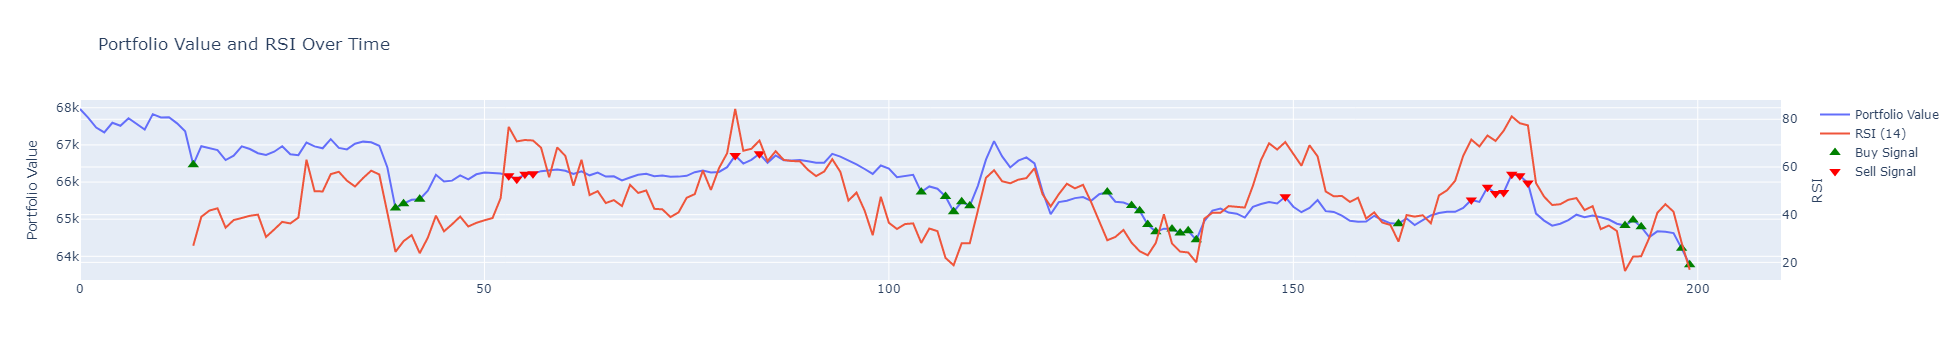

In [13]:
# RSI策略回测
import pdb
import ccxt
import numpy as np
import pandas as pd
import wind_library
import vectorbt as vbt
import plotly.graph_objs as go

# 获取Gate.io交易所BTC/USDT的1小时K线数据
btc_price = wind_library.get_ccxt_exchange_kline('gate', 'BTC/USDT', 'spot', '1h', 200).close

# RSI参数设置
rsi_window = 14

# 计算RSI指标
rsi = vbt.RSI.run(btc_price, rsi_window, short_name='RSI')

# 定义进入和退出条件：RSI低于某个阈值买入，高于某个阈值卖出
entry_threshold = 30  # RSI低于30时看涨
exit_threshold = 70  # RSI高于70时看跌
entries = rsi.rsi < entry_threshold
exits = rsi.rsi > exit_threshold

# 创建投资组合对象
pf = vbt.Portfolio.from_signals(btc_price, entries, exits, direction='longonly', size=np.inf, fees=0.001, freq='1h', sl_stop=0.01, tp_stop=0.02)

# 打印结果
print(f'total_return:\t{pf.total_return():.2f}%')
print(f'entries_counts:\t{entries[entries].sum()}{"\t"*3}exits_counts:\t{exits[exits].sum()}')  # 统计信号数量
print(pf.trades.records_readable[['Entry Fees', 'Exit Fees', 'PnL', 'Return']])

# 准备绘图数据
trades_plot_data = pf.trades.plot(width=1000)._data  # 获取原始的Plotly图形数据

# 获取买入和卖出信号点
entry_points = btc_price[entries].index
exit_points = btc_price[exits].index

# 创建双Y轴图
fig = go.Figure()

# 添加交易记录图（价格变动）
fig.add_trace(go.Scatter(    x=trades_plot_data[0]['x'],    y=trades_plot_data[0]['y'],    name='Portfolio Value',    yaxis='y1'))

# 添加RSI图
fig.add_trace(go.Scatter(    x=btc_price.index,    y=rsi.rsi,    name=f'RSI ({rsi_window})',    yaxis='y2'))

# 添加买入和卖出信号点
fig.add_trace(go.Scatter(    x=entry_points,    y=btc_price[entries],    mode='markers',    marker=dict(symbol='triangle-up', size=10, color='green'),    name='Buy Signal',    yaxis='y1'))

fig.add_trace(go.Scatter(    x=exit_points,    y=btc_price[exits],    mode='markers',    marker=dict(symbol='triangle-down', size=10, color='red'),    name='Sell Signal',    yaxis='y1'))

# 配置双Y轴
fig.update_layout(    yaxis=dict(title='Portfolio Value', side='left'),    yaxis2=dict(title='RSI', overlaying='y', side='right'),    title='Portfolio Value and RSI Over Time',    showlegend=True)

# 显示图表
fig.show()

In [14]:
# -*- coding: utf-8 -*-
import io
import sys

    # 获取指定库的所有函数名
def save_package_help(package_name):
    package = __import__(package_name)
    all_functions = [func for func in dir(package) if callable(getattr(package, func))]

    # 创建一个 io.StringIO 对象，用于捕获 help 输出
    help_output = io.StringIO()

    # 重定向标准输出到 help_output
    sys.stdout = help_output

    # 遍历所有函数，获取帮助文本
    help_text = ""
    for func_name in all_functions:
        try:
            help_text += f"# {func_name}\n\n"  # 在每个函数帮助文本前插入标题
            help(getattr(package, func_name))
            help_text += help_output.getvalue() + "\n\n"  # 将帮助文本添加到总的帮助文本中
            help_output.truncate(0)  # 清空 help_output
            help_output.seek(0)
        except:
            pass

    # 恢复标准输出
    sys.stdout = sys.__stdout__

    # 将帮助文本保存为 .txt 格式的文件
    file_path = f"{package_name}_help.txt"
    with io.open(file_path, "w", encoding="utf-8") as file:
        file.write(help_text)

    print(f"帮助文本已保存到 {file_path}")

# example 调用函数保存指定库的帮助文本
# save_package_help("vectorbt")

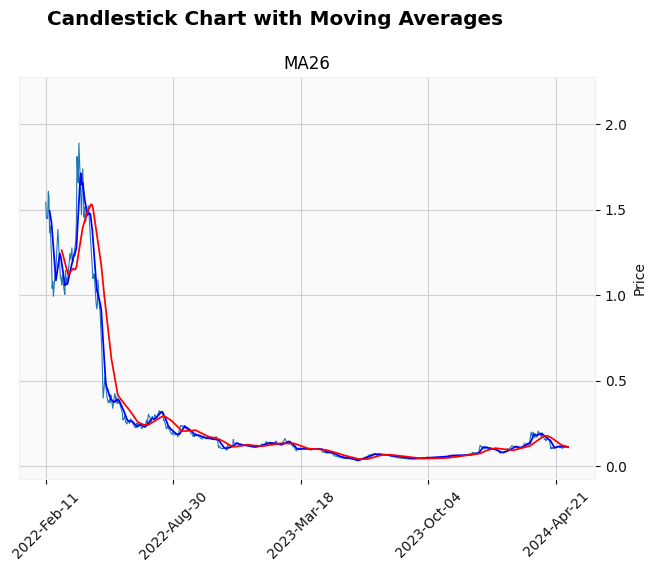

In [27]:
import mplfinance as mpf
import pandas as pd

# 创建示例数据
data = pd.read_csv('..//data//Gate.io_ACA_swap_1d.csv', index_col=0, parse_dates=True)
data.index.name = 'datetime'

# 计算移动平均线
data['MA7'] = data['close'].rolling(window=7).mean()
data['MA26'] = data['close'].rolling(window=26).mean()

# 创建蜡烛图并添加技术指标
add_plot = [
    mpf.make_addplot(data['MA7'], color='b', title='MA7'),
    mpf.make_addplot(data['MA26'], color='r', title='MA26')
]

mpf.plot(data, type='line', style='yahoo', title='Candlestick Chart with Moving Averages', ylabel='Price', addplot=add_plot)

Total Return [%]: 1.165637		Win Rate [%]: 33.333333		Max Drawdown [%]: 3.863727
entries_counts:	5			exits_counts:	5
   Entry Fees  Exit Fees       PnL    Return
0    0.099900   0.099585  0.115806  0.001159
1    0.100016   0.099469 -0.746086 -0.007460
2    0.099270   0.099845 -0.773827 -0.007795
3    0.098497   0.097996 -0.697988 -0.007086
4    0.097800   0.095808  1.798580  0.018390
5    0.099597   0.099740 -0.056132 -0.000564
6    0.099541   0.099683 -0.341523 -0.003431
7    0.099200   0.099083 -0.314467 -0.003170
8    0.098885   0.096707  1.982889  0.020052
9    0.100866   0.000000  0.198386  0.001967


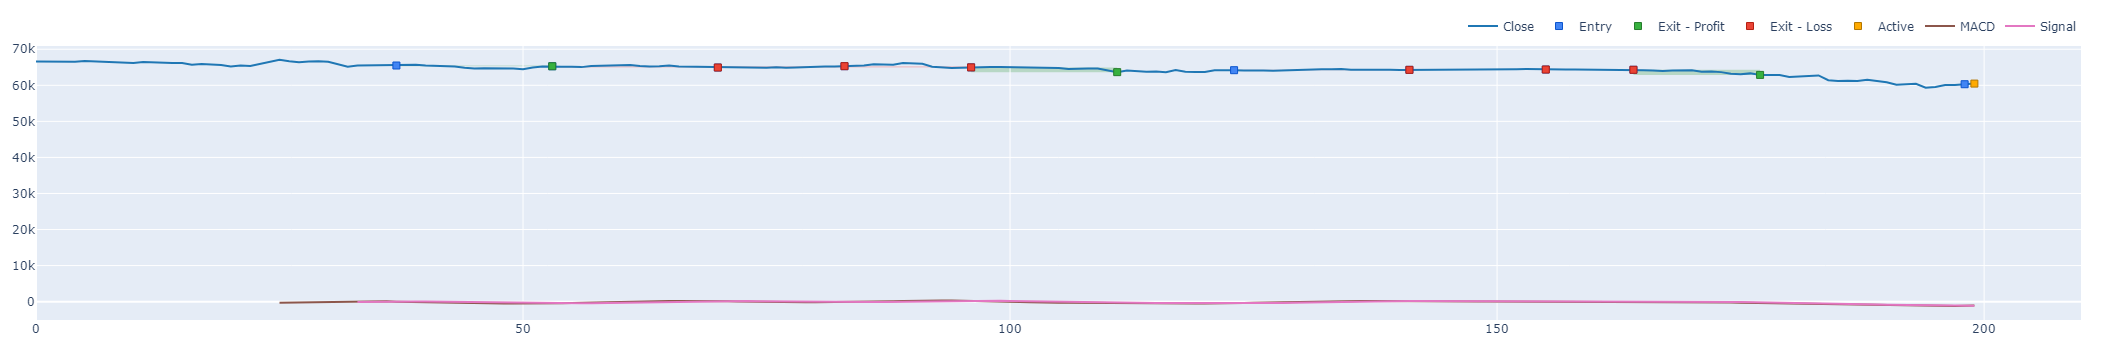

In [7]:
# MACD回测
import numpy as np
import pandas as pd
import wind_library
import vectorbt as vbt

# 获取Gate.io交易所BTC/USDT的1小时K线数据
btc_price = wind_library.get_ccxt_exchange_kline('gate', 'BTC/USDT', 'spot', '1h', 200).close

# MACD参数设置
fast_window = 12
slow_window = 26
signal_window = 9

# 计算MACD指标
macd = vbt.MACD.run(btc_price, fast_window, slow_window, signal_window)

# 定义进入和退出条件：MACD线从下方上穿信号线买入，从上方下穿信号线卖出
entries = (macd.macd > macd.signal) & (macd.macd.shift(1) <= macd.signal.shift(1))
exits = (macd.macd < macd.signal) & (macd.macd.shift(1) >= macd.signal.shift(1))

# 创建投资组合对象
# 注意：这里假设只进行多头交易，即direction='longonly'
pf = vbt.Portfolio.from_signals(btc_price, entries, exits, direction='both', size=np.inf, fees=0.001, freq='1h', sl_stop=0.01, tp_stop=0.02)
# print(pf.stats().loc[['Total Return [%]', 'Win Rate [%]', 'Max Drawdown [%]']])    # 打印部分结果

# 打印结果
stats = pf.stats().loc[['Total Return [%]', 'Win Rate [%]', 'Max Drawdown [%]']]    # 获取统计数据
print('\t\t'.join([f'{stat}: {value:.6f}' for stat, value in stats.items()]))   # 格式化为横向排版
# print(f'total_return:\t{pf.total_return():.2f}%')
print(f'entries_counts:\t{entries[entries].count()}{"\t"*3}exits_counts:\t{exits[exits].count()}')
print(pf.trades.records_readable[['Entry Fees', 'Exit Fees', 'PnL', 'Return']])

# 绘制图表
fig = pf.trades.plot(width=1000)
fig.add_scatter(x=btc_price.index, y=macd.macd, mode='lines', name='MACD')
fig.add_scatter(x=btc_price.index, y=macd.signal, mode='lines', name='Signal')
fig.show()  # 显示图表


     MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9
0             NaN            NaN            NaN
1             NaN            NaN            NaN
2             NaN            NaN            NaN
3             NaN            NaN            NaN
4             NaN            NaN            NaN
..            ...            ...            ...
195   -468.881650     233.408490    -702.290140
196   -411.473552     232.653271    -644.126823
197   -353.023634     232.882551    -585.906185
198   -340.236677     196.535606    -536.772284
199   -321.060153     172.569704    -493.629857

[200 rows x 3 columns]
Total Return [%]: 2.569218		Win Rate [%]: 50.000000		Max Drawdown [%]: 2.285051
entries_counts:	2			exits_counts:	2
   Entry Fees  Exit Fees       PnL    Return
0    0.099900   0.098844 -1.254789 -0.012560
1    0.098647   0.096418  2.033845  0.020617
2    0.100678   0.100656 -0.224188 -0.002227
3    0.100454   0.098241  2.014350  0.020052


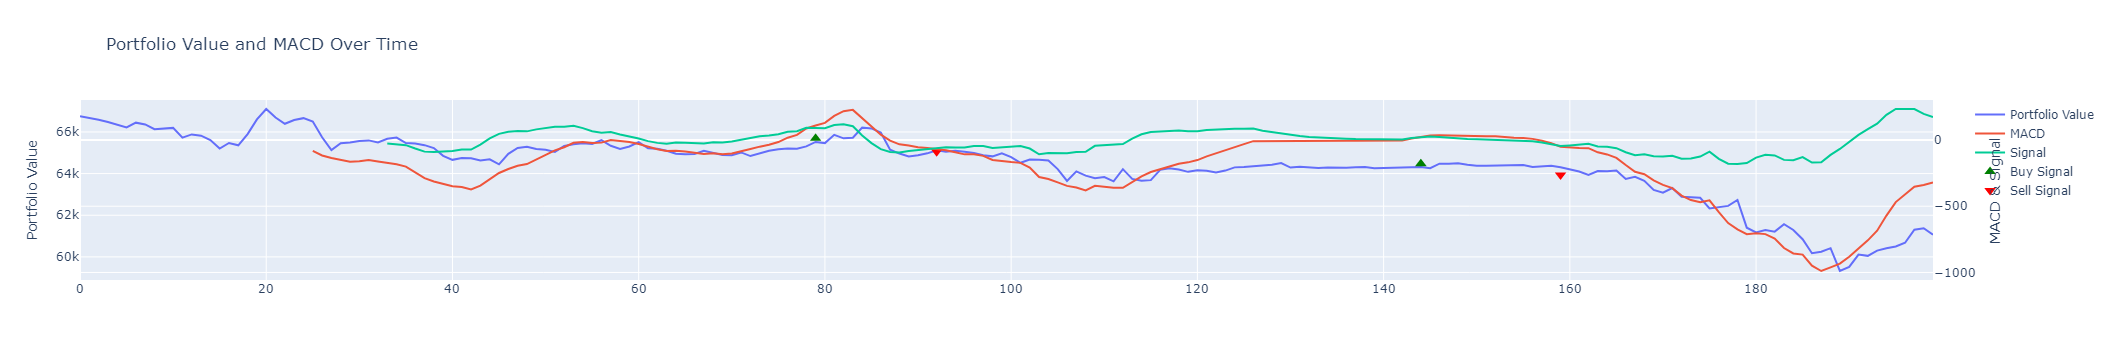

In [9]:
# MACD回测
import pdb
import ccxt
import numpy as np
import pandas as pd
import wind_library
import pandas_ta as ta
import vectorbt as vbt
import plotly.graph_objs as go
symbol = 'BTC/USDT'; exchange = 'gate'
price = wind_library.get_ccxt_exchange_kline(exchange, symbol, 'swap', '1h', 200).close   # 获取Gate.io交易所BTC/USDT的1小时K线数据

# 计算MACD指标
macd = ta.macd(price, fast=12, slow=26, signal=9)
# 定义进入和退出条件：MACD线上穿Signal线买入，MACD线下穿Signal线卖出
macd_value = macd['MACD_12_26_9']
macd_signal = macd['MACDh_12_26_9']
# 定义进入和退出条件：MACD线上穿Signal线买入，MACD线下穿Signal线卖出
entries = (macd_value > macd_signal) & (macd_value.shift() < macd_signal.shift())  # MACD线上穿Signal线
exits = (macd_value < macd_signal) & (macd_value.shift() > macd_signal.shift())  # MACD线下穿Signal线

pf = vbt.Portfolio.from_signals(btc_price, entries, exits, direction='both', size=np.inf, fees=0.001, freq='1h', sl_stop=0.01, tp_stop=0.02)
# ...创建投资组合和打印结果的代码不变...
# 打印结果
stats = pf.stats().loc[['Total Return [%]', 'Win Rate [%]', 'Max Drawdown [%]']]    # 获取统计数据
print('\t\t'.join([f'{stat}: {value:.6f}' for stat, value in stats.items()]))   # 格式化为横向排版
print(f'entries_counts:\t{entries[entries].count()}{"\t"*3}exits_counts:\t{exits[exits].count()}')
print(pf.trades.records_readable[['Entry Fees', 'Exit Fees', 'PnL', 'Return']])
# 准备绘图数据
# ...获取交易记录图数据代码不变...

trades_plot_data = pf.trades.plot(width=1000)._data
# 获取买入和卖出信号点
entry_points = price[entries].index
exit_points = price[exits].index
# 创建双Y轴图
fig = go.Figure()

# 添加交易记录图（价格变动）
fig.add_trace(go.Scatter(
    x=trades_plot_data[0]['x'],
    y=trades_plot_data[0]['y'],
    name='Portfolio Value',
    yaxis='y1'
))

# 添加MACD图
fig.add_trace(go.Scatter(
    x=price.index,
    y=macd_value,
    name='MACD',
    yaxis='y2'
))

fig.add_trace(go.Scatter(
    x=price.index,
    y=macd_signal,
    name='Signal',
    yaxis='y2'
))

# 添加买入和卖出信号点
fig.add_trace(go.Scatter(
    x=entry_points,
    y=price[entries],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signal',
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=exit_points,
    y=price[exits],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signal',
    yaxis='y1'
))

# 配置双Y轴
fig.update_layout(
    yaxis=dict(title='Portfolio Value', side='left'),
    yaxis2=dict(title='MACD & Signal', overlaying='y', side='right'),
    title='Portfolio Value and MACD Over Time',
    showlegend=True
)

# 显示图表
fig.show()

total_return:	-0.02%
entries_counts:	15			exits_counts:	15
    Entry Fees  Exit Fees       PnL    Return
0     0.099900   0.099539 -0.560223 -0.005608
1     0.099340   0.099637 -0.495869 -0.004992
2     0.098845   0.098653 -0.389506 -0.003941
3     0.098456   0.097412  0.847715  0.008610
4     0.099303   0.098896 -0.605464 -0.006097
5     0.098698   0.099128 -0.627594 -0.006359
6     0.098071   0.097842 -0.424803 -0.004332
7     0.097647   0.097542 -0.090924 -0.000931
8     0.097556   0.097099 -0.651730 -0.006681
9     0.096905   0.096289  0.422930  0.004364
10    0.097327   0.098037  0.514018  0.005281
11    0.097841   0.098108 -0.463342 -0.004736
12    0.097378   0.096980 -0.591869 -0.006078
13    0.096787   0.096314  0.279167  0.002884
14    0.097065   0.098493  1.231846  0.012691
15    0.098296   0.096922  1.178676  0.011991
16    0.099474   0.099081 -0.590790 -0.005939
17    0.098883   0.097997  0.689648  0.006974
18    0.099572   0.099689 -0.082651 -0.000830
19    0.099490   0.09

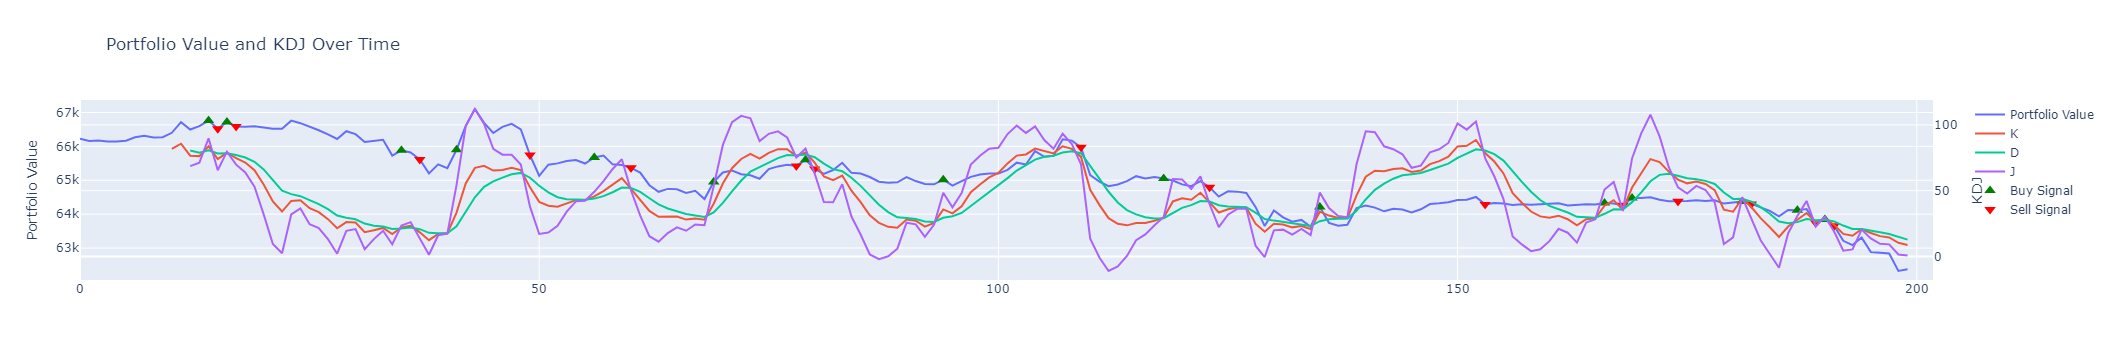

In [5]:
# KDJ回测
import pdb
import ccxt
import numpy as np
import pandas as pd
import pandas_ta as ta
import vectorbt as vbt
import plotly.graph_objs as go

# 假设 wind_library.get_ccxt_exchange_kline 函数已经定义并且能够正确获取数据
# 获取Gate.io交易所BTC/USDT的1小时K线数据
btc_kline = wind_library.get_ccxt_exchange_kline('gate', 'BTC/USDT', 'spot', '1h', 200)    # dataframe['datetime', 'open', 'high', 'low', 'close', 'volume']

# 计算KDJ指标
# 确保已经正确安装并导入了 pandas_ta，且btc_kline中包含 'high', 'low', 'close' 列
kdj = ta.kdj(high=btc_kline['high'], low=btc_kline['low'], close=btc_kline['close'], length=9, signal=3)

# 由于列名是 K_9_3, D_9_3, J_9_3，我们需要使用这些列名
# 定义进入和退出条件：K线上穿D线买入，K线下穿D线卖出
entries = (kdj['K_9_3'] > kdj['D_9_3']) & (kdj['K_9_3'].shift() < kdj['D_9_3'].shift())  # K线上穿D线
exits = (kdj['K_9_3'] < kdj['D_9_3']) & (kdj['K_9_3'].shift() > kdj['D_9_3'].shift())  # K线下穿D线

# 创建投资组合对象
pf = vbt.Portfolio.from_signals(btc_kline['close'], entries, exits, direction='both', size=np.inf, fees=0.001, freq='1h', sl_stop=0.01, tp_stop=0.02)   # longonly

# 打印结果
print(f'total_return:\t{pf.total_return():.2f}%')
print(f'entries_counts:\t{entries.sum()}{"\t"*3}exits_counts:\t{exits.sum()}')  # 统计信号数量
print(pf.trades.records_readable[['Entry Fees', 'Exit Fees', 'PnL', 'Return']])

# 准备绘图数据
trades_plot_data = pf.trades.plot(width=1000)._data  # 获取原始的Plotly图形数据

# 获取买入和卖出信号点
entry_points = btc_kline['close'][entries].index
exit_points = btc_kline['close'][exits].index

# 创建双Y轴图
fig = go.Figure()

# 添加交易记录图（价格变动）
fig.add_trace(go.Scatter(
    x=trades_plot_data[0]['x'],
    y=trades_plot_data[0]['y'],
    name='Portfolio Value',
    yaxis='y1'
))

# 添加KDJ图
fig.add_trace(go.Scatter(
    x=kdj.index,
    y=kdj['K_9_3'],
    name='K',
    yaxis='y2'
))

fig.add_trace(go.Scatter(
    x=kdj.index,
    y=kdj['D_9_3'],
    name='D',
    yaxis='y2'
))

# 添加J线
fig.add_trace(go.Scatter(
    x=kdj.index,
    y=kdj['J_9_3'],
    name='J',
    yaxis='y2'
))

# 添加买入和卖出信号点
fig.add_trace(go.Scatter(
    x=entry_points,
    y=btc_kline['close'][entries],
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Buy Signal',
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=exit_points,
    y=btc_kline['close'][exits],
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Sell Signal',
    yaxis='y1'
))

# 配置双Y轴
fig.update_layout(
    yaxis=dict(title='Portfolio Value', side='left'),
    yaxis2=dict(title='KDJ', overlaying='y', side='right'),
    title='Portfolio Value and KDJ Over Time',
    showlegend=True
)

# 显示图表
fig.show()



In [17]:
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt

df_ohlcv = pd.read_csv('..//data//Gate.io_ACA_swap_1d.csv', index_col=0, parse_dates=True)
close = df_ohlcv['close']
# close.plot()
mstd = vbt.MSTD.run(close, window=10)#
mstd.plot()
# print(mstd)

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'name': 'MSTD',
              'showlegend': True,
              'type': 'scatter',
              'uid': '8dfa8a1d-f695-45c3-b5c8-361463bb3681',
              'x': array([datetime.datetime(2022, 2, 11, 0, 0),
                          datetime.datetime(2022, 2, 12, 0, 0),
                          datetime.datetime(2022, 2, 13, 0, 0), ...,
                          datetime.datetime(2024, 5, 11, 0, 0),
                          datetime.datetime(2024, 5, 12, 0, 0),
                          datetime.datetime(2024, 5, 13, 0, 0)], dtype=object),
              'y': array([       nan,        nan,        nan, ..., 0.00444077, 0.00460283,
                          0.00486046])}],
    'layout': {'height': 350,
               'legend': {'orientation': 'h',
                          'traceorder': 'normal',
                          'x': 1,
                          'xanchor': 'right',
                          'y': 1.02,
                          'yanchor': 'bottom'},
               'margin': {'b': 30, 'l': 30, 'r': 30, 't': 30},
               'template': '...',
               'width': 700}
})

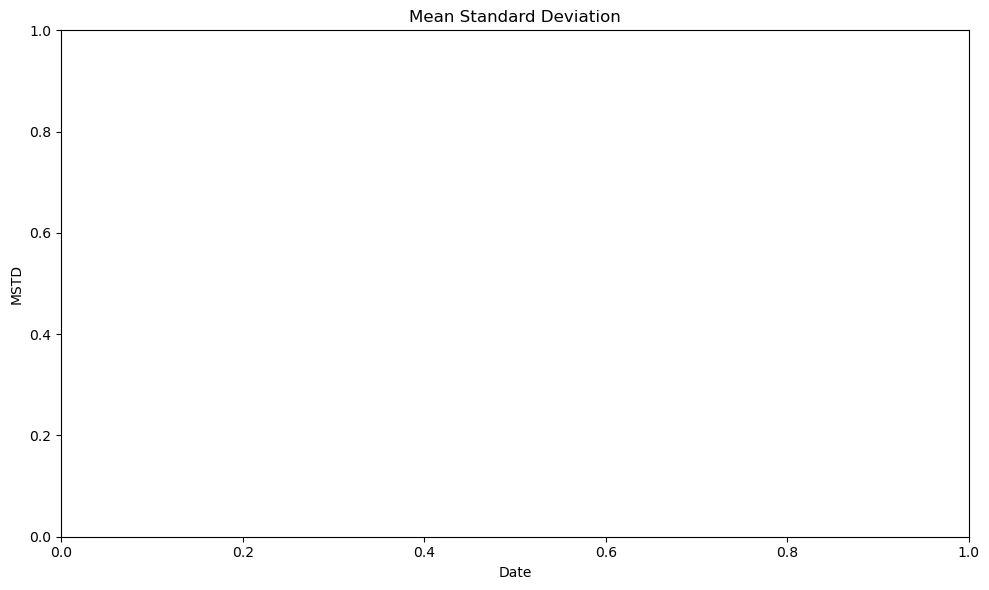

In [18]:
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt

# Read the CSV data
df_ohlcv = pd.read_csv('..//data//Gate.io_ACA_swap_1d.csv', index_col=0, parse_dates=True)
close = df_ohlcv['close']

# Calculate Mean Standard Deviation (MSTD)
mstd = vbt.MSTD.run(close, window=10)

# Plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
mstd.plot()
plt.title('Mean Standard Deviation')
plt.xlabel('Date')
plt.ylabel('MSTD')
plt.tight_layout()
plt.show()